In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#STEP 1 - IMPORTATION AND VISUALIZATION OF DATASET 
#Step-1.1 Importing required python libraries 

import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import numpy as np # for numerical computing
import pandas as pd # for data manipulation and analysis
import keras # building and testing deep learning models 

In [ ]:
#Step 1.2 - Read and exploration of the dataset
#code to load the dataset
RTA_df = pd.read_csv("/content/drive/MyDrive/Semester 1 - Msc_ARU_JP/Application of ML/Assignment /Assignment /Road Accident Analysis and Classification using machine learning/R3/RTA Dataset.csv")
#code to print the first few rows of the dataset
RTA_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
#Code to print the shape of the dataframe
print("The shape of the dataset is :", RTA_df.shape)

The shape of the dataset is : (12316, 32)


In [ ]:
#code to print the features of our dataset
print("The features of the dataset:", RTA_df.columns)

The features of the dataset: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [ ]:
#finding missing values present in each column
RTA_df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
#code to print the Data set information
RTA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

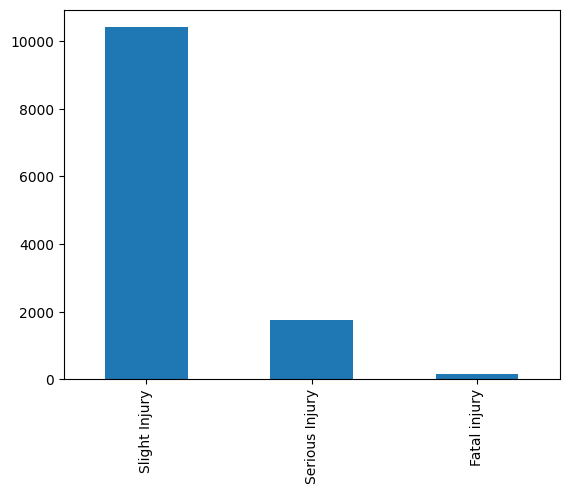

In [ ]:
#Graphical visualization (Data distribution visualization)
#target variable classes distribution and visualization
print(RTA_df['Accident_severity'].value_counts())
RTA_df['Accident_severity'].value_counts().plot(kind='bar')

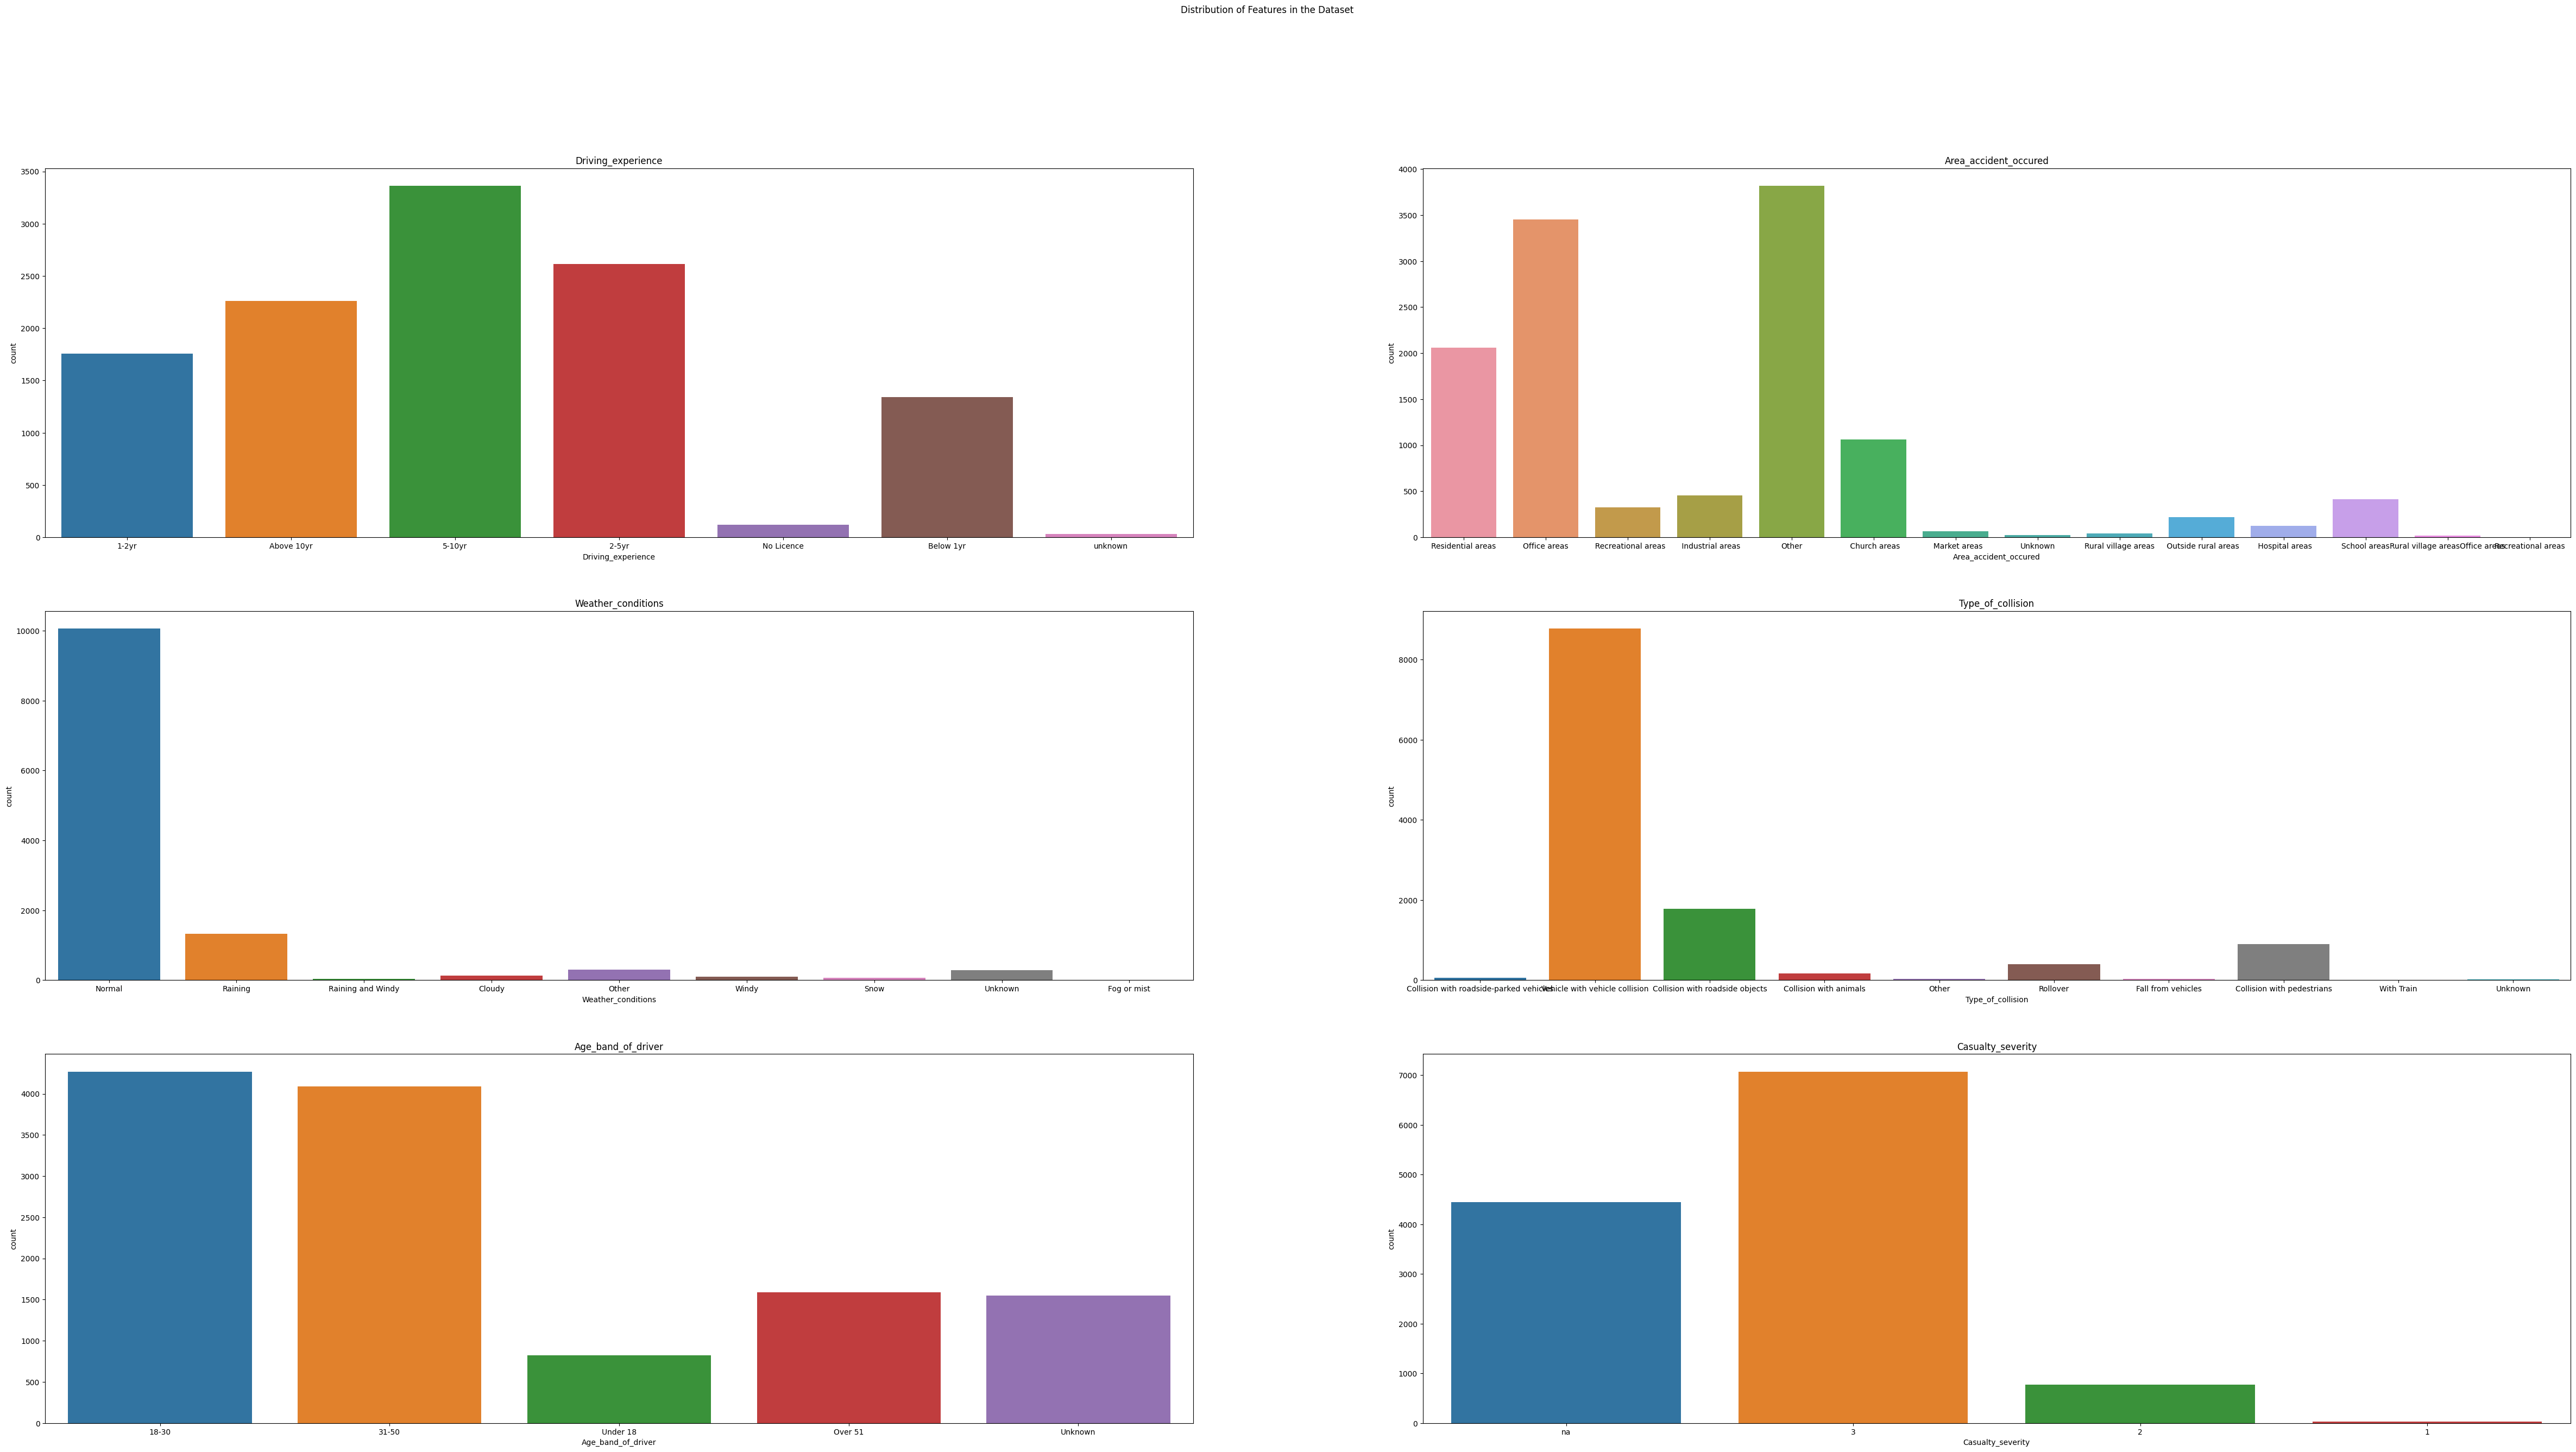

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(60, 30))
#code to print the Distribution of the class features 
sns.countplot(ax=axes[0, 0], data=RTA_df, x="Driving_experience") # Plot data on the subplot
axes[0, 0].set_title("Driving_experience") # Set title for the subplot

sns.countplot(ax=axes[0, 1], data=RTA_df, x="Area_accident_occured")
axes[0, 1].set_title("Area_accident_occured")

sns.countplot(ax=axes[1, 0], data=RTA_df, x="Weather_conditions")
axes[1, 0].set_title("Weather_conditions")

sns.countplot(ax=axes[1, 1], data=RTA_df, x="Type_of_collision")
axes[1, 1].set_title("Type_of_collision")

sns.countplot(ax=axes[2, 0], data=RTA_df, x="Age_band_of_driver")
axes[2, 0].set_title("Age_band_of_driver")

sns.countplot(ax=axes[2, 1], data=RTA_df, x="Casualty_severity")
axes[2, 1].set_title("Casualty_severity")

# Set overall title for the figure
fig.suptitle("Distribution of Features in the Dataset")

# Display the figure
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

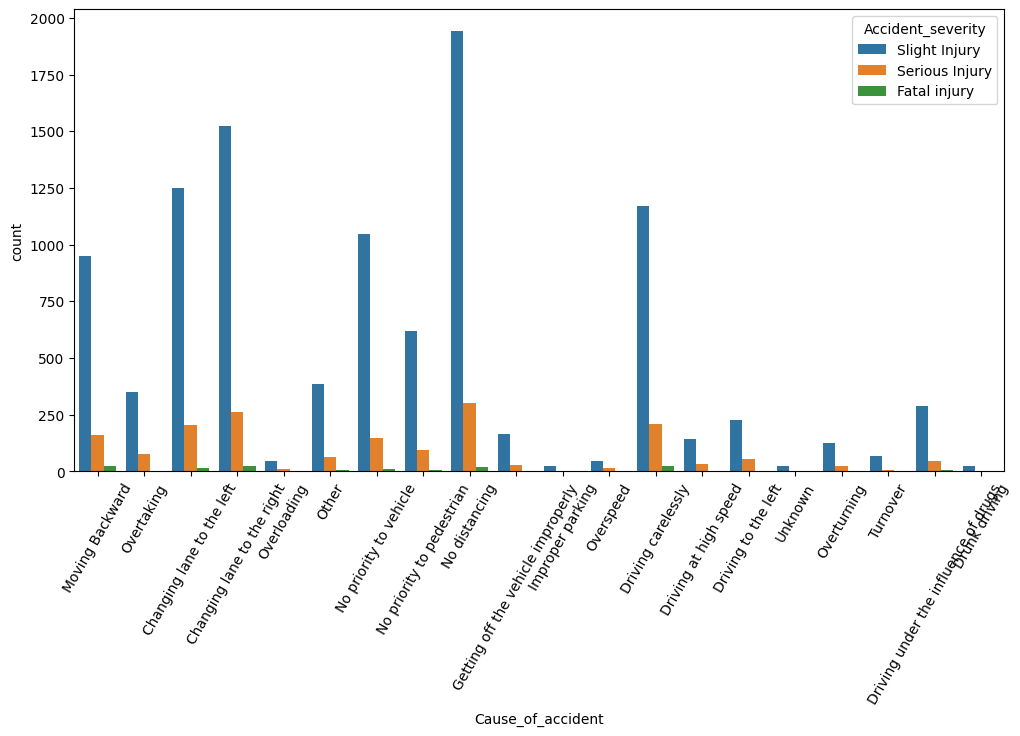

In [ ]:
#STEP 2: EXPLANATORY DATA ANALYSIS AND PREPROCESSING
#Step 2.1 -  plot the bar plot of Cause_of_accident and Accident_severity feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='Cause_of_accident', hue='Accident_severity', data=RTA_df)
plt.xlabel('Cause_of_accident')
plt.xticks(rotation=60)
plt.show

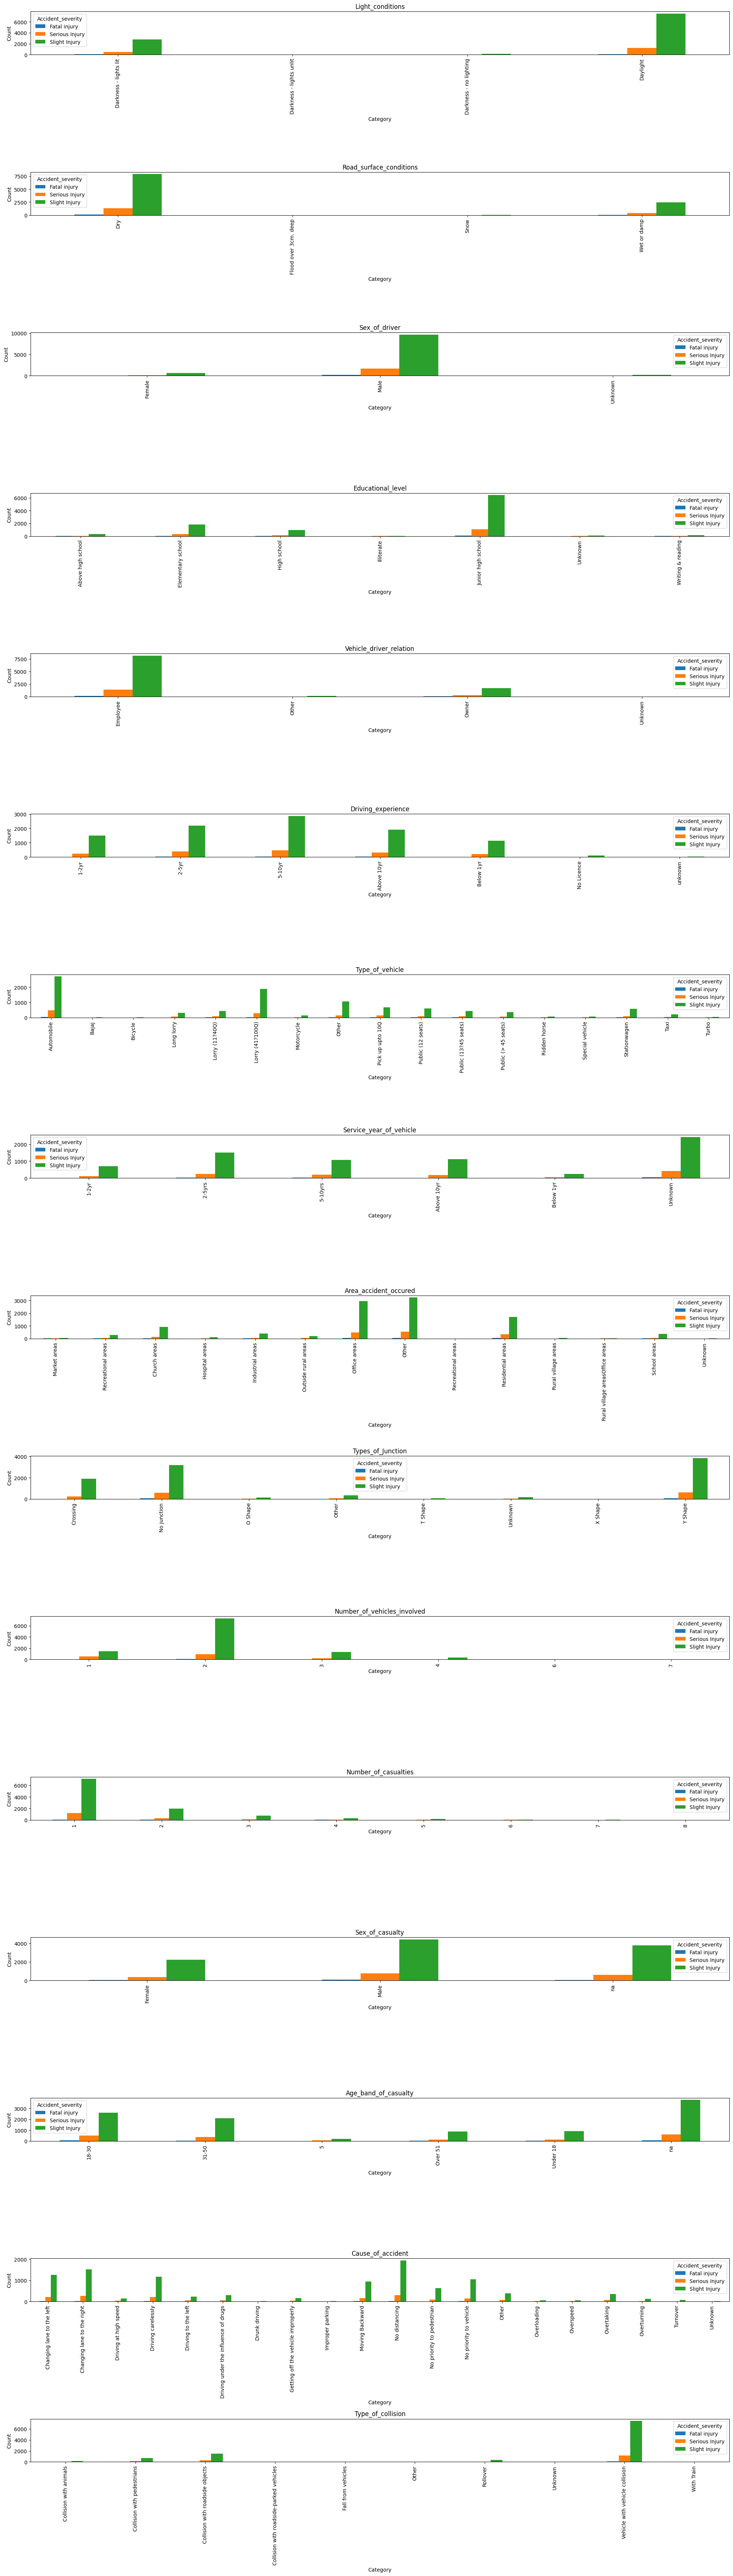

In [ ]:
# plot the Freq bar plot of other features againt the target feature
categorical_cols = ['Light_conditions','Road_surface_conditions', 'Sex_of_driver',
                     'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
                     'Type_of_vehicle', 'Service_year_of_vehicle',
                     'Area_accident_occured','Types_of_Junction', 'Number_of_vehicles_involved',
                     'Number_of_casualties',
                     'Sex_of_casualty', 'Age_band_of_casualty',
                     'Cause_of_accident','Type_of_collision']
target_col = 'Accident_severity'

# create subplots for each categorical column
fig, axs = plt.subplots(len(categorical_cols), figsize=(20, 70))

# plot frequency tables for each categorical column based on the target variable
for i, col in enumerate(categorical_cols):
    grouped = RTA_df.groupby([target_col, col])[col].count()
    unstacked = grouped.unstack(target_col, fill_value=0)
    unstacked.plot(kind='bar', ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Count')
    axs[i].legend(title=target_col)

plt.tight_layout()
plt.show()

In [ ]:
#Step 2.2 - Data preparation
# convert “Time” column datatype to the “datetime” datatype 
RTA_df['Time'] = pd.to_datetime(RTA_df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = RTA_df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [ ]:
# Selection of features for further processing
selected_features = ['Day_of_week','Age_band_of_driver', 'Sex_of_driver',
                     'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
                     'Type_of_vehicle', 'Service_year_of_vehicle',
                     'Area_accident_occured','Types_of_Junction', 'Number_of_vehicles_involved',
                     'Number_of_casualties',
                     'Sex_of_casualty', 'Age_band_of_casualty',
                     'Cause_of_accident','Type_of_collision','Hour_of_Day']

# Create a new dataframe with only the selected features
feature_df = n_df[selected_features]

# Print the first few rows and colmns 
feature_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Types_of_Junction,Number_of_vehicles_involved,Number_of_casualties,Sex_of_casualty,Age_band_of_casualty,Cause_of_accident,Type_of_collision,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Above 10yr,Residential areas,No junction,2,2,na,na,Moving Backward,Collision with roadside-parked vehicles,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),5-10yrs,Office areas,No junction,2,2,na,na,Overtaking,Vehicle with vehicle collision,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),NaN,Recreational areas,No junction,2,2,Male,31-50,Changing lane to the left,Collision with roadside objects,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),NaN,Office areas,Y Shape,2,2,Female,18-30,Changing lane to the right,Vehicle with vehicle collision,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,5-10yrs,Industrial areas,Y Shape,2,2,na,na,Overtaking,Vehicle with vehicle collision,1


In [ ]:
#codes to print features of the dataset
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Service_year_of_vehicle      8388 non-null   object
 8   Area_accident_occured        12077 non-null  object
 9   Types_of_Junction            11429 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Sex_of_casualty              12316 non-null  object
 13  Age_band_of_casualty         12

In [ ]:
#handling missing values
#we fill missing values and spaces as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

# features information
feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Service_year_of_vehicle      12316 non-null  object
 8   Area_accident_occured        12316 non-null  object
 9   Types_of_Junction            12316 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Sex_of_casualty              12316 non-null  object
 13  Age_band_of_casualty         12

<ipython-input-20-f1e3d6d7534d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
<ipython-input-20-f1e3d6d7534d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
<ipython-input-20-f1e3d6d7534d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
# Categorical features to encode using one hot encoding 
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']

# setting input features X and target y 
X = feature_df[features]  
y = n_df['Accident_severity']

# Pandas get_dummies method for one-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [ ]:
#Target encoding using ‘LabelEncoder()’ method
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [ ]:
#STEP 3 - FEATURE SELECTION AND MODEL TRAINING
#Step 3.1 - feature selection method using chi2 for categorical output, categorical input
#import Libraries 
from sklearn.feature_selection import SelectKBest, chi2

#Use the SelectKBest class to select the k best features based on a chi2 score function 
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [ ]:
#Step 3.2 - upsample the dataset to balance target features.

 #importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape

/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 50), (31245,))

In [ ]:
# print the target classes distribution
print(y_n.value_counts())

2    10415
1    10415
0    10415
dtype: int64


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# define model architectures
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
svm = SVC(kernel='linear', random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')

# fit the classifier to the training data
rf.fit(X_trn, y_trn)
svm.fit(X_trn, y_trn)
nn.fit(X_trn, y_trn)
knn.fit(X_trn, y_trn)

# predict on test data
rf_preds = rf.predict(X_tst)
svm_preds = svm.predict(X_tst)
nn_preds = nn.predict(X_tst)
knn_preds = knn.predict(X_tst)

#accuracy of the models
print('Accuracy of Random Forest Classifier:', accuracy_score(y_tst, rf_preds))
print('Accuracy of Support Vector Classifier:', accuracy_score(y_tst, svm_preds))
print('Accuracy of Multi-layer Perceptron classifier:', accuracy_score(y_tst, nn_preds))
print('Accuracy of KNeighborsClassifier:', accuracy_score(y_tst, knn_preds))

# calculate f1 scores for each model
rf_f1 = f1_score(y_tst, rf_preds, average='weighted')
svm_f1 = f1_score(y_tst, svm_preds, average='weighted')
nn_f1 = f1_score(y_tst, nn_preds, average='weighted')
knn_f1 = f1_score(y_tst, knn_preds, average='weighted')

# print out the f1 scores for each model
print("Random Forest F1 score: {:.2f}".format(rf_f1))
print("SVM F1 score: {:.2f}".format(svm_f1))
print("Neural Network F1 score: {:.2f}".format(nn_f1))
print("KNeighbors F1 score: {:.2f}".format(knn_f1))

#Classifification Report
print("\nClassification Report of Randoom Forest Classifier:\n:", classification_report(y_tst, rf_preds))
print("\nClassification Report of Support Vector Classifier:\n:", classification_report(y_tst, svm_preds))
print("\nClassification Report of Multi-Layer Perception Classifier:\n:", classification_report(y_tst, nn_preds))
print("\nClassification Report of KNeighbors Classifier:\n:", classification_report(y_tst, knn_preds))


Accuracy of Random Forest Classifier: 0.8844615138422147
Accuracy of Support Vector Classifier: 0.6834693550968155
Accuracy of Multi-layer Perceptron classifier: 0.8668586973915826
Accuracy of KNeighborsClassifier: 0.8058889422307569
Random Forest F1 score: 0.88
SVM F1 score: 0.68
Neural Network F1 score: 0.87
KNeighbors F1 score: 0.79

Classification Report of Randoom Forest Classifier:
:               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2085
           1       0.84      0.84      0.84      2100
           2       0.86      0.86      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249


Classification Report of Support Vector Classifier:
:               precision    recall  f1-score   support

           0       0.68      0.78      0.72      2085
           1       0.59      0.53      0.56      2100
        

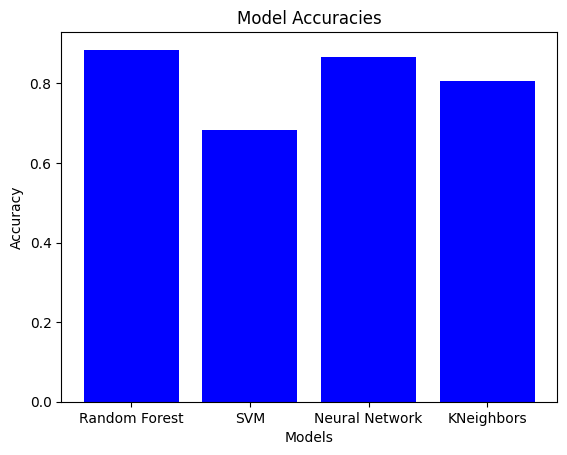

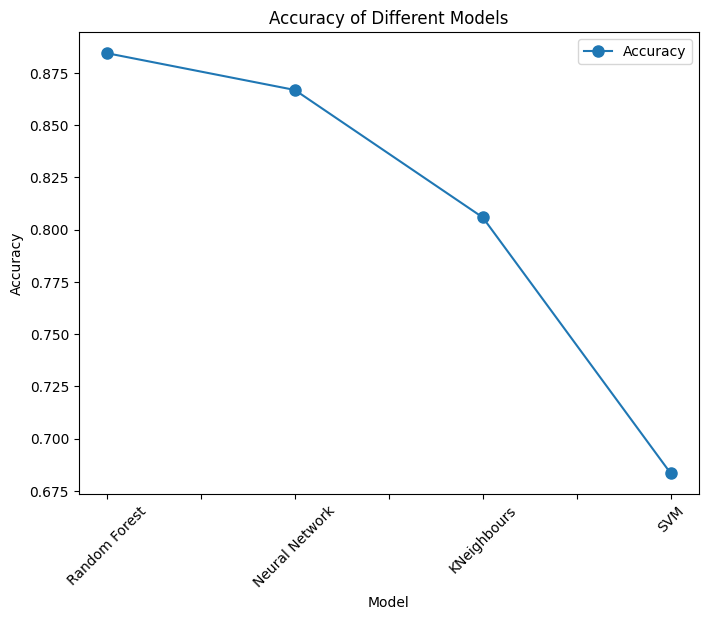

In [34]:
import matplotlib.pyplot as plt

# create a list of models and their accuracy scores
models = ['Random Forest', 'SVM', 'Neural Network', 'KNeighbors']
scores = [accuracy_score(y_tst, rf_preds), accuracy_score(y_tst, svm_preds), accuracy_score(y_tst, nn_preds), accuracy_score(y_tst, knn_preds)]

# plot the bar chart
plt.bar(models, scores, color='blue')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# create a dictionary to store the accuracies
accuracies = {'Random Forest':  accuracy_score(y_tst, rf_preds), 'SVM': accuracy_score(y_tst, svm_preds), 'Neural Network': accuracy_score(y_tst, nn_preds), 'KNeighbours': accuracy_score(y_tst, knn_preds)}

# create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy'])

# sort the DataFrame by Accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# plot the accuracies as a line graph
df.plot(kind='line', marker='o', markersize=8, figsize=(8,6))
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

